In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

2024-11-05 04:37:09.496562: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-05 04:37:09.503653: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-05 04:37:09.518916: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1730799429.543048  804489 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1730799429.548598  804489 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-05 04:37:09.575516: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

Loading the MNIST data from keras.datasets

In [3]:
(X_train, Y_train), (X_test, Y_test) =  mnist.load_data()

In [4]:
type(X_train)

numpy.ndarray

In [5]:
# shape of the numpy arrays
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


Training data = 60,000 Images

Test data = 10,000 Images

Image dimension  --> 28 x 28

Grayscale Image  --> 1 channel

In [6]:
#print an image
print(X_train[5])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  13  25 100
  122   7   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  33 151 208 252 252
  252 146   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  40 152 244 252 253 224 211
  252 232  40   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  15 152 239 252 252 252 21

In [7]:
#checking the dimension of the 5th image
print(X_train[5].shape)

(28, 28)


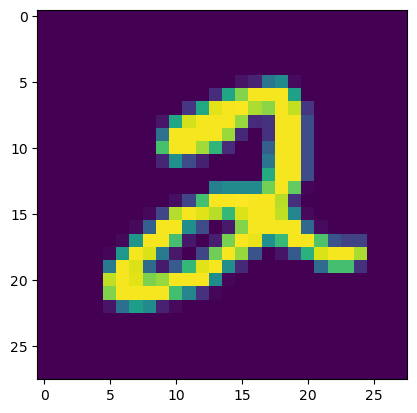

2


In [8]:
# dispay the image
plt.imshow(X_train[5])
plt.show()

# print the corresponding label of the 5th image
print(Y_train[5])

In [9]:
#checking how may unique values are available which helps when creating the neural layers
print(np.unique(Y_train))
print(np.unique(Y_test))

# here we use np.unique() instead of unique() because it is a numpy array

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


We can use these labels as such or we can also apply One Hot Encoding

All the images have the same dimensions in this dataset, If not, we have to resize all the images to a common dimension

In [10]:
# scaling the values(her scaling is important in order to increase the accuracy of our model to put it in a more managable range of between 0 - 1)

X_train = X_train/255
X_test = X_test/255

# we do not scale Y because it is the result being predicted we only do this for X

In [11]:

# printing an image to make sure the scaling worked image

print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

Building the neural network

In [12]:
# setting up the layers of the Neural  Network

model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),# incase of an RGB image we will add the channel parameter(eras.layers.Flatten(input_shape=(28,28,3)))
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(10, activation='sigmoid')# here 10 is specific because we have 10 specific values to be predicted
])

/home/kayi/anaconda3/envs/tensor/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2024-11-05 04:37:13.838630: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [13]:
# compiling the Neural Network

model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',# here if it is a one hot we use (categorical_crossentropy)
              metrics=['accuracy'])

Training the Neural Network

In [14]:
model.fit(X_train, Y_train, epochs=10)

Epoch 1/10


2024-11-05 04:37:14.878686: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.8509 - loss: 0.5105
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9543 - loss: 0.1519
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9673 - loss: 0.1078
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9745 - loss: 0.0833
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9788 - loss: 0.0682
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9820 - loss: 0.0574
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.9852 - loss: 0.0487
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 23ms/step - accuracy: 0.9883 - loss: 0.0405
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 47s 25ms/step - accuracy: 0.9888 - loss: 0.0366
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.9902 - loss: 0.0329


Training accuracy = 99.02%

Accuracy on training data

In [15]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(accuracy)

2024-11-05 04:40:58.147378: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.9664 - loss: 0.1281
0.968999981880188


Test data accuray = 96.9 %

In [16]:
print(X_test.shape)

(10000, 28, 28)


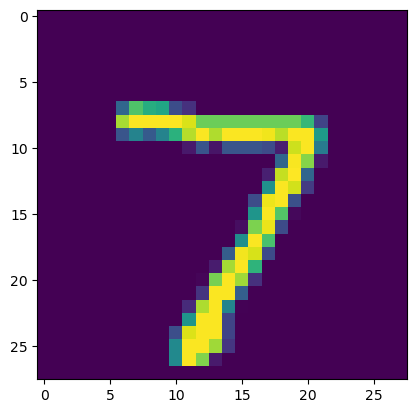

7


In [17]:
# first data point in X_test
plt.imshow(X_test[0])
plt.show()

# corresponding lacel
print(Y_test[0])

Prediction

In [18]:
Y_pred = model.predict(X_test)

2024-11-05 04:41:07.515342: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step


In [19]:
print(Y_pred.shape)

(10000, 10)


In [20]:
print(Y_pred[0])

[8.0134378e-05 1.5677374e-03 1.6111534e-02 9.5856732e-01 8.6559893e-10
 9.2285343e-02 1.3438259e-15 9.9995047e-01 2.8770003e-01 3.9915729e-01]


we receive thjis kind of results because when you use predict it gives the answer in terms of prbability and the highest probability value is the correct value

For easier time we convert the probabilities to class label

In [21]:
label_for_first_test_image = np.argmax(Y_pred[0])
print(label_for_first_test_image)

7


In [22]:
# converting the prediction probabilities to class label for all test data points
Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 2, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 9, 9, 3, 9, 0, 3, 5, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 6, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 0, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

Y_test  -->  True labels

Y_pred_labels  -->  Predicted Labels

Confusin Matrix

In [23]:
conf_mat = confusion_matrix(Y_test, Y_pred_labels)
conf_mat

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 958,    0,    2,    0,    3,    1,    3,    0,    3,   10],
       [   0, 1115,    3,    3,    0,    0,    4,    0,   10,    0],
       [   1,    0,  987,   18,   10,    0,    1,    7,    7,    1],
       [   0,    0,    1,  989,    1,    3,    0,    3,    3,   10],
       [   0,    0,    0,    1,  967,    0,    4,    1,    0,    9],
       [   3,    0,    0,   22,    2,  843,    3,    3,    8,    8],
       [   6,    3,    1,    1,    8,    9,  923,    0,    6,    1],
       [   0,    2,    6,    7,    1,    0,    1,  989,    2,   20],
       [   1,    1,    5,   15,    6,    3,    1,    1,  936,    5],
       [   1,    1,    1,    4,   15,    2,    0,    1,    2,  982]],
      dtype=int32)>

Text(0.5, 47.7222222222222, 'Predicted Labels')

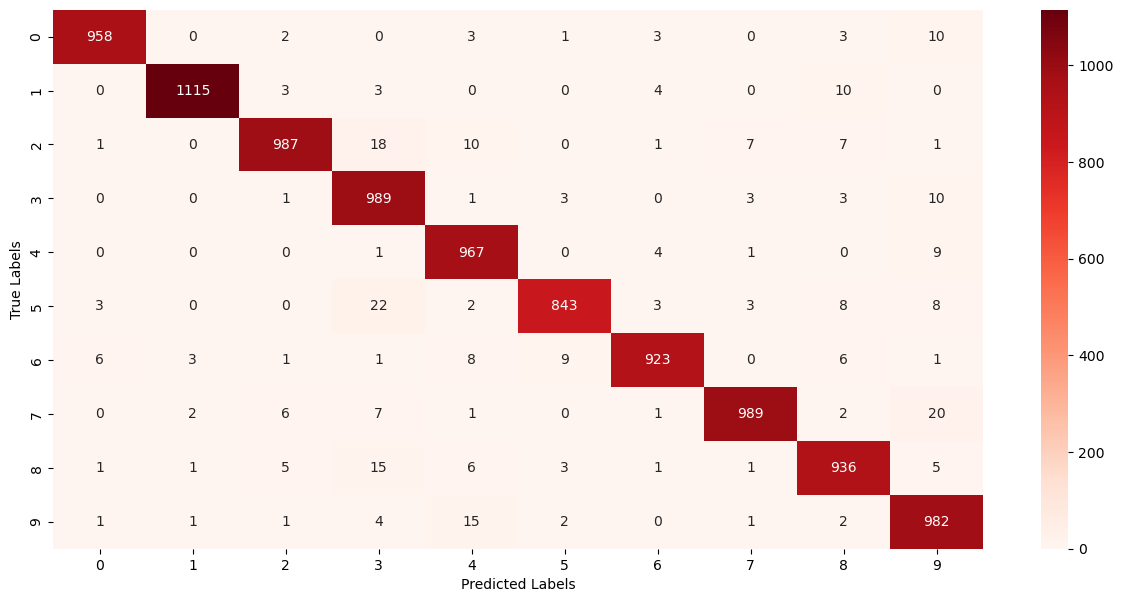

In [24]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Reds')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

Building a Predictive System

In [25]:
# read in the image
img_path ='/home/kayi/Desktop/ML_projects/MNIST Digital classification with NN/MNIST_digit.png'
img = cv2.imread(img_path)

In [26]:
import os

image_path = '/home/kayi/Desktop/ML_projects/MNIST Digital classification with NN/MNIST_digit.png'
if not os.path.exists(image_path):
    print(f"Image file does not exist: {image_path}")
else:
    print(f"Image found at: {image_path}")


Image found at: /home/kayi/Desktop/ML_projects/MNIST Digital classification with NN/MNIST_digit.png


In [27]:
type(img)

numpy.ndarray

In [28]:
print(img)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


In [29]:
img.shape

(318, 318, 3)

In [30]:
grayscale = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

In [31]:
grayscale.shape

(318, 318)

In [32]:
input_image_resize = cv2.resize(grayscale, (28, 28))

In [33]:
input_image_resize.shape

(28, 28)

In [35]:
cv2.imshow('resized and gray image',input_image_resize)


# Wait for a key press and then close the window
cv2.waitKey(0)
cv2.destroyAllWindows()

QObject::moveToThread: Current thread (0xa259330) is not the object's thread (0xaad3210).
Cannot move to target thread (0xa259330)

QObject::moveToThread: Current thread (0xa259330) is not the object's thread (0xaad3210).
Cannot move to target thread (0xa259330)

QObject::moveToThread: Current thread (0xa259330) is not the object's thread (0xaad3210).
Cannot move to target thread (0xa259330)

QObject::moveToThread: Current thread (0xa259330) is not the object's thread (0xaad3210).
Cannot move to target thread (0xa259330)

QObject::moveToThread: Current thread (0xa259330) is not the object's thread (0xaad3210).
Cannot move to target thread (0xa259330)

QObject::moveToThread: Current thread (0xa259330) is not the object's thread (0xaad3210).
Cannot move to target thread (0xa259330)

QObject::moveToThread: Current thread (0xa259330) is not the object's thread (0xaad3210).
Cannot move to target thread (0xa259330)

QObject::moveToThread: Current thread (0xa259330) is not the object's thread

In [37]:
input_image_resize

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  38,  43,
        105, 255, 253, 253, 253, 253, 253, 174,   6,   0,   0,   0,   0,
          0,   0],
       [  

In [38]:
input_image_resize = input_image_resize/255

In [39]:
type(input_image_resize)

numpy.ndarray

In [40]:
input_image_resize.shape

(28, 28)

#### Purpose of the Reshaping
The np.reshape() function is used to change the dimensions of an array without changing its data. In this case, it's transforming the input_image_resize array into a new shape, which is likely intended to match the format expected by a machine learning model or some other processing step.

Let's break it down:

input_image_resize: This is presumably an image that has already been resized to 28x28 pixels, which is common for datasets like MNIST, where images are typically 28x28 grayscale images of handwritten digits.

np.reshape(input_image_resize, [1, 28, 28]): The goal of this reshape operation is to modify the shape of the input_image_resize array. After the reshape:

The image is now a 3D array with shape [1, 28, 28].
1 indicates that there is 1 image in this batch. This is often required when working with machine learning models, as many models expect the input to be in batch format (even if there's only one image). The 1 denotes a batch size of 1.
28x28: This is the spatial size of the image (height and width), which is typical for image datasets like MNIST. The reshaped image will have 28 rows and 28 columns, each representing pixel values.

In [41]:
image_reshaped = np.reshape(input_image_resize, [1,28,28])

In [42]:
input_prediction = model.predict(image_reshaped)
print(input_prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
[[6.8764661e-10 5.5184830e-02 1.0253701e-06 1.0000000e+00 1.3578118e-14
  7.5951681e-02 2.0763856e-23 2.9854933e-04 4.9293786e-02 9.9643683e-01]]


In [43]:
input_pred_label = np.argmax(input_prediction)

In [44]:
input_pred_label

3

Predictive model summary 

In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

input_image_resize = cv2.resize(grayscale, (28, 28))

input_image_resize = input_image_resize/255

image_reshaped = np.reshape(input_image_resize, [1,28,28])

input_prediction = model.predict(image_reshaped)

input_pred_label = np.argmax(input_prediction)

print('The Handwritten Digit is recognised as ', input_pred_label)